In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import pandas as pd
from scipy import special
import scipy.stats as sps

In [21]:
# lets estimate the parameters for the gamma function from the data
# first by maximum likelihood
def MLE_gamma(data):
    avg = data.mean()
    s = np.log(avg) - np.log(data).mean()
    k0 = (3 - s + np.sqrt((s -3)**2 +24*s))/12/s
#    print("initial guess:",k0)
    for i in range(4):
        k = k0 - (np.log(k0)-special.digamma(k0)-s)/(1/k0-special.polygamma(1,k0))
#        print("next guess:",k)
        k0=k
    return (k,avg/k)

In [20]:
rates = pd.read_excel("data/Translation_inhibition.xlsx")

mean:  0.005220415594360093 std:  0.003275892290003307
gamma k:  2.24431053543 theta:  0.00232606651884
2.539515856345431 0.002055673557349901


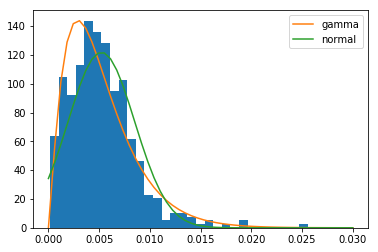

In [44]:
betg = rates["betg"]
betg = betg[~np.isnan(betg)]
print("mean: ",betg.mean(),"std: ",betg.std())
betgx = np.linspace(0,0.03)
betg_normal = sps.norm.pdf(x=betgx,loc=betg.mean(),scale=betg.std())

k_betg,theta_betg = MLE_gamma(betg)
print("gamma k: ",k_betg,"theta: ",theta_betg)
betg_gamma = sps.gamma.pdf(x=betgx,a=k_betg,scale=theta_betg)

betg_var = betg.std()**2
betg_mean = betg.mean()

betg_theta2 = betg_var/betg_mean
betg_k2 = betg_mean/betg_theta2
print(betg_k2,betg_theta2)
betg_gamma2 = sps.gamma.pdf(x=betgx,a=betg_k2,scale=betg_theta2)

plt.hist(betg, bins=30, normed=True)
plt.plot(betgx,betg_gamma,label="gamma")
plt.plot(betgx,betg_normal,label="normal")
plt.legend()

mean:  0.04213745247148287 std:  0.013207291507296843
gamma k:  11.007273402 theta:  0.00382814625681


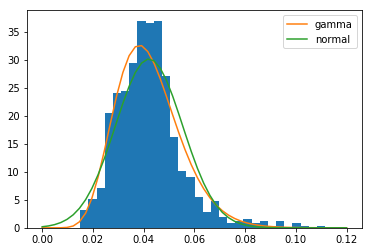

In [43]:
betr = rates["betr"]
betr = betr[~np.isnan(betr)]
print("mean: ",betr.mean(),"std: ",betr.std())
betrx = np.linspace(0,0.12)
betr_normal = sps.norm.pdf(x=betrx,loc=betr.mean(),scale=betr.std())

k_betr,theta_betr = MLE_gamma(betr)
print("gamma k: ",k_betr,"theta: ",theta_betr)
betr_gamma = sps.gamma.pdf(x=betrx,a=k_betr,scale=theta_betr)

plt.hist(betr,bins=30,normed=True)
plt.plot(betrx,betr_gamma,label="gamma")
plt.plot(betrx,betr_normal,label="normal")
plt.legend()

mean:  1.283028655097614 std:  0.4785823666235206
gamma k:  8.31602457913 theta:  0.154283894052


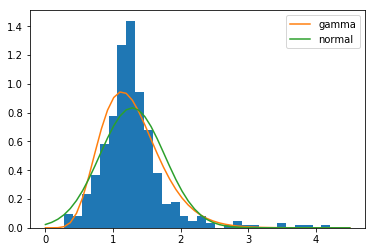

In [42]:
kmg = rates["kmg"]
kmg = kmg[~np.isnan(kmg)]

print("mean: ",kmg.mean(),"std: ",kmg.std())
kmgx = np.linspace(0,4.5)
kmg_normal = sps.norm.pdf(x=kmgx,loc=kmg.mean(),scale=kmg.std())

k_kmg,theta_kmg = MLE_gamma(kmg)
print("gamma k: ",k_kmg,"theta: ",theta_kmg)
kmg_gamma = sps.gamma.pdf(x=kmgx,a=k_kmg,scale=theta_kmg)

plt.hist(kmg,bins=30,normed=True)
plt.plot(kmgx,kmg_gamma,label="gamma")
plt.plot(kmgx,kmg_normal,label="normal")
plt.legend()

mean:  0.3029073130544996 std:  0.08147004882135454
gamma k:  12.3271276488 theta:  0.0245724163555


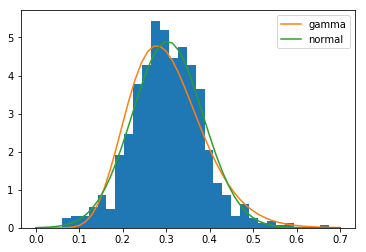

In [41]:
kmr = rates["kmr"]
kmr = kmr[~np.isnan(kmr)]
print("mean: ",kmr.mean(),"std: ",kmr.std())

kmrx = np.linspace(0,0.7)
kmr_normal = sps.norm.pdf(x=kmrx,loc=kmr.mean(),scale=kmr.std())

k_kmr,theta_kmr = MLE_gamma(kmr)
print("gamma k: ",k_kmr,"theta: ",theta_kmr)
kmr_gamma = sps.gamma.pdf(x=kmrx,a=k_kmr,scale=theta_kmr)

plt.hist(kmr,bins=30,normed=True)
plt.plot(kmrx,kmr_gamma,label="gamma")
plt.plot(kmrx,kmr_normal,label="normal")
plt.legend()